In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chapter-3-islr/College.csv
/kaggle/input/chapter-3-islr/Income2.csv
/kaggle/input/chapter-3-islr/Auto.data
/kaggle/input/chapter-3-islr/Ch10Ex11.csv
/kaggle/input/chapter-3-islr/Auto.csv
/kaggle/input/chapter-3-islr/Income1.csv
/kaggle/input/chapter-3-islr/Advertising.csv
/kaggle/input/chapter-3-islr/Credit.csv
/kaggle/input/chapter-3-islr/Heart.csv


In [2]:
import pandas as pd # import pandas
import numpy as np # import numpy
from matplotlib.pyplot import subplots  #import mpl plots

In [3]:
Auto = pd.read_csv("../input/chapter-3-islr/Auto.csv")

Auto["horsepower"] # see only the horsepower column
#notice that the dtype is object, rather than decimal, float etc

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [4]:
np.unique(Auto["horsepower"]) 
#notice that there is a ? value, causing it to be dtype object

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [5]:
Auto = pd.read_csv("../input/chapter-3-islr/Auto.csv"
                  ,na_values=['?'])
Auto['horsepower'].sum()

40952.0

In [6]:
Auto.shape #see number of rows and the columns

(397, 9)

In [7]:
Auto_new = Auto.dropna() # drop NA values
Auto_new.shape # see shape of "cleaned" data

(392, 9)

In [8]:
Auto = Auto_new
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
#select only the rows I want , being the first 3
# the 3 represents the data point i do NOT want and beyond
Auto[0:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [10]:
idx_80 = Auto["year"] > 80
Auto[idx_80] #find any rows in Auto that meets this criteria

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


In [11]:
Auto.index
# Notice even though we dropped na, index still includes dropped values!

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

In [12]:
Auto_re = Auto.set_index("name")
#reset index using the name
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [13]:
Auto_re.columns
#name is no longer there, its taken out as a result of the indexing

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [14]:
rows = ['amc rebel sst', 'ford torino'] # filter for these rows
Auto_re.loc[rows] #apply filter
#NOTE: if py cannot find a item in the array, it returns an error

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [15]:
Auto_re.iloc [[3 ,4]] #retrieve 4th and 5 rows
Auto_re.iloc [[3 ,4] ,[0 ,2 ,3]] # retrieve 4/5th row as well as 1st,3rth and 4th row
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']] 
#find rows relating to ford galaxie 500, for col mpg and origin

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


In [16]:
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]
# alternative way to find any item with year > 80, and show only col weight and origin

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [17]:
Auto_re.loc[lambda df: (df['displacement'] < 300)
    & (df.index.str.contains('ford')| df.index.str.contains('datsun')),
    ['weight', 'origin']]
#notice the use of & to add more args
#also noce the use of |

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1
datsun 510 (sw),2288,3


In [18]:
# FOR loops
total = 0 
for value in [2 ,3 ,19]: 
    for weight in [3, 2, 1]: 
        total += value * weight 
print('Total is: {0}'.format(total))

Total is: 144


In [19]:
rng = np.random.default_rng(1) #generate random number
A = rng.standard_normal((127,5))
# create 127 rows with 5 empty col
M = rng.choice([0, np.nan], p=[0.8 ,0.2],size=A.shape) 
A += M
D = pd.DataFrame(A, columns=['food','bar','pickle','snack','popcorn']) 
# use the same A random number generator, on all 5 created colows
D[:3]


,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


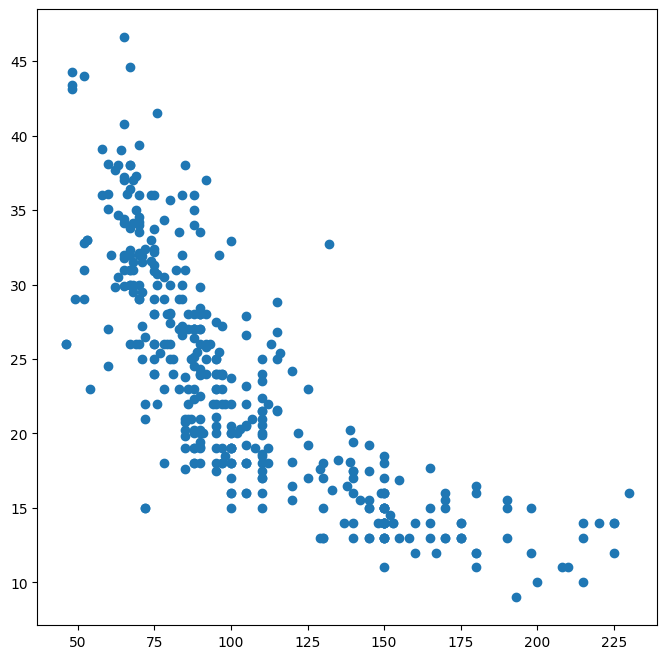

In [20]:
fig , ax = subplots(figsize=(8, 8)) 
ax.plot(Auto['horsepower'], Auto['mpg'],'o');

<Axes: xlabel='horsepower', ylabel='mpg'>

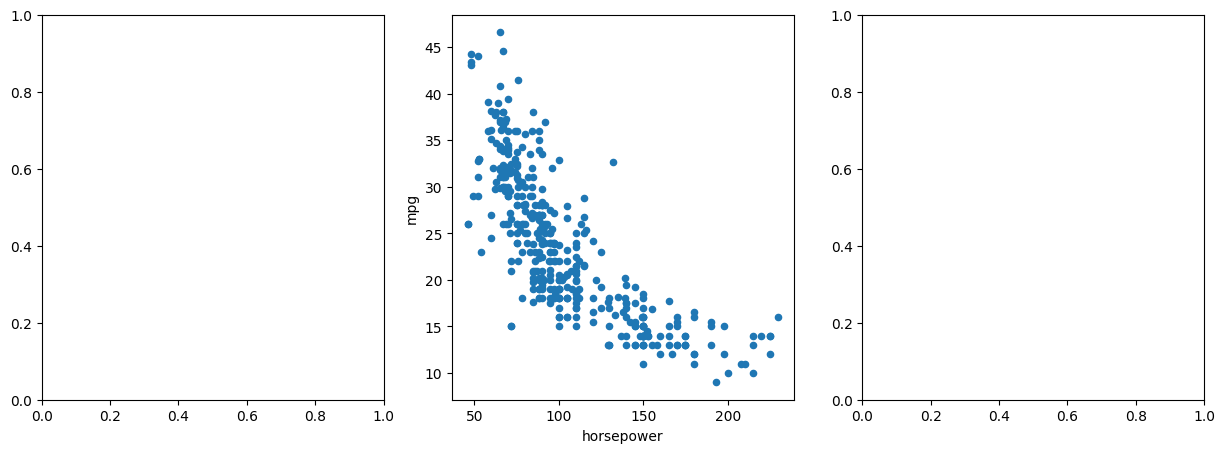

In [21]:
fig , axes = subplots(ncols=3, figsize =(15, 5)) 
# create a space for plots, with 3 columns of a specified size
Auto.plot.scatter('horsepower', 'mpg', ax=axes [1])
# populate in index 1 , or 2nd or middle

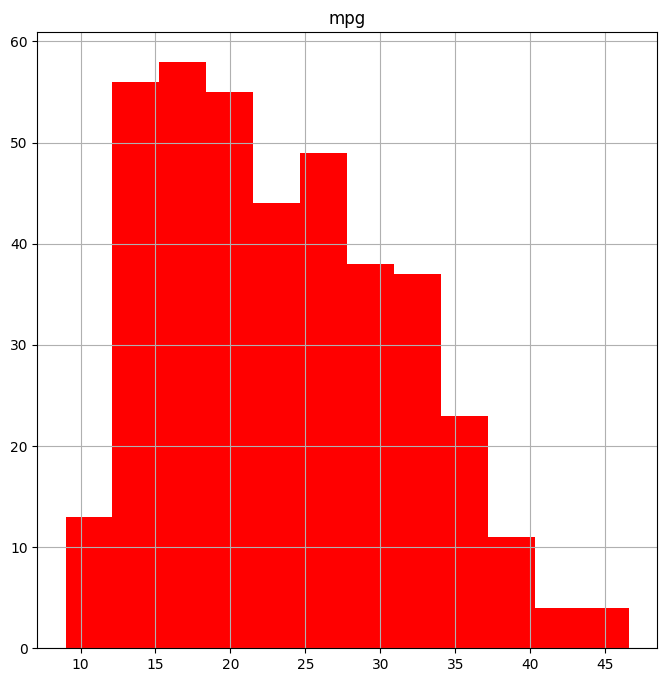

In [22]:
fig , ax = subplots(figsize =(8, 8)) 
Auto.hist('mpg', color='red', bins =12, ax=ax);

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>]], dtype=object)

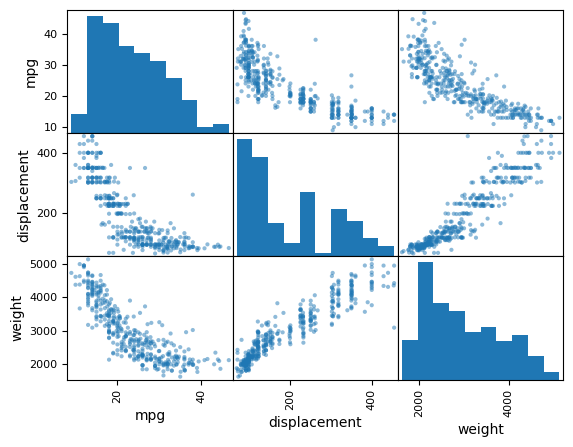

In [23]:
pd.plotting.scatter_matrix(Auto[['mpg','displacement','weight']])

In [24]:
Auto[['mpg', 'weight']]. describe()

,mpg,weight
count,392.000000,392.000000
mean,23.445918,2977.584184
std,7.805007,849.402560
min,9.000000,1613.000000
25%,17.000000,2225.250000
50%,22.750000,2803.500000
75%,29.000000,3614.750000
max,46.600000,5140.000000
